In [2]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Kay\Downloads\movies.csv')

In [4]:
# Now let's take a look at the data

df.head()

,budget,name,rating,genre,year,released,score,votes,director,writer,star,country,gross,company,runtime
0,19000000.0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,46998772.0,Warner Bros.,146.0
1,4500000.0,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,58853106.0,Columbia Pictures,104.0
2,18000000.0,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,538375067.0,Lucasfilm,124.0
3,3500000.0,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,83453539.0,Paramount Pictures,88.0
4,6000000.0,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,39846344.0,Orion Pictures,98.0


In [5]:
#THIS dataset has a row of 7668 and 15 columns
size = df.shape
size

(7668, 15)

In [6]:
#View the data type to evaluate data set use
df.dtypes

budget      float64
name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
gross       float64
company      object
runtime     float64
dtype: object

<Axes: xlabel='gross', ylabel='budget'>

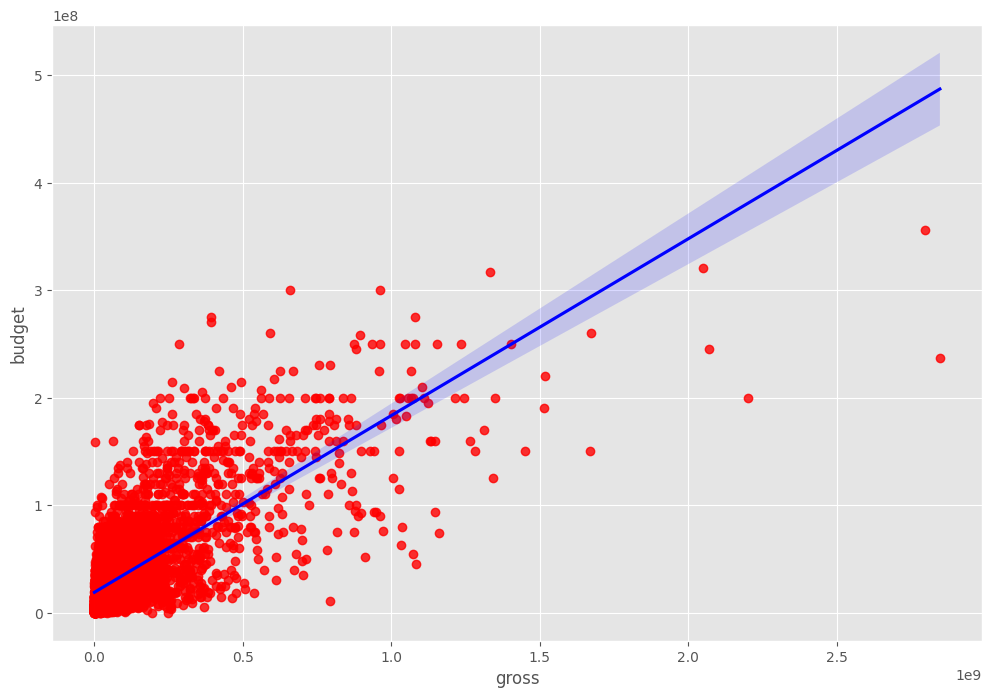

In [7]:
#Correlation Plot between gross and budget
sns.regplot(x="gross", y="budget", data=df, scatter_kws={"color": "Red"}, line_kws={"color" : "Blue"})

In [8]:
#df.describe()

In [20]:
# budget_Q1 = df['budget'].quantile(0.25)
# budget_Q3 = df['budget'].quantile(0.75)
# budget_IQR = budget_Q3 - budget_Q1
# gross_Q1 = df['gross'].quantile(0.25)
# gross_Q3 = df['gross'].quantile(0.75)
# gross_IQR = gross_Q3 - gross_Q1
# votes_Q1 = df['votes'].quantile(0.25)
# votes_Q3 = df['votes'].quantile(0.75)
# votes_IQR = votes_Q3 - votes_Q1
# df = df[~((df['budget'] < (budget_Q1- 1.5 * budget_IQR)) | (df['budget'] > (budget_Q3 + 1.5 * budget_IQR)))]
# df = df[~((df['gross'] < (gross_Q1 - 1.5 * gross_IQR)) | (df['gross'] > (gross_Q3 + 1.5 * gross_IQR)))]
# df = df[~((df['votes'] < (votes_Q1 - 1.5 * votes_IQR)) | (df['votes'] > (votes_Q3 + 1.5 * votes_IQR)))]



In [9]:
#converting all none integer values of interest to distinct values
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit(df['company'])
df['company_enc']=encoder.transform(df['company'])
encoder.fit(df['writer'])
df['writer_enc']=encoder.transform(df['writer'])
encoder.fit(df['star'])
df['star_enc']=encoder.transform(df['star'])
encoder.fit(df['director'])
df['director_enc']=encoder.transform(df['director'])
encoder.fit(df['released'])
df['released_enc']=encoder.transform(df['released'])
encoder.fit(df['genre'])
df['genre_enc']=encoder.transform(df['genre'])
encoder.fit(df['name'])
df['name_enc']=encoder.transform(df['name'])
encoder.fit(df['rating'])
df['rating_enc']=encoder.transform(df['rating'])


In [10]:
new_df = df[['budget', 'year', 'score', 'votes', 'gross', 'runtime','company_enc', 'writer_enc','star_enc', 'director_enc', 'released_enc','name_enc','rating_enc' ]]
new_df.corr()

,budget,year,score,votes,gross,runtime,company_enc,writer_enc,star_enc,director_enc,released_enc,name_enc,rating_enc
budget,1.000000,0.329321,0.076254,0.442429,0.740395,0.320447,0.170408,-0.039451,-0.020122,-0.012272,0.014683,0.023970,-0.204940
year,0.329321,1.000000,0.097995,0.222945,0.257486,0.120811,-0.011477,-0.007894,-0.027944,-0.020795,0.000077,0.011453,0.037372
score,0.076254,0.097995,1.000000,0.409182,0.186258,0.399451,-0.004850,0.019804,-0.000721,0.009559,0.042148,0.017097,0.022385
votes,0.442429,0.222945,0.409182,1.000000,0.630757,0.309212,0.130488,0.000226,-0.019525,0.000260,0.016154,0.013088,-0.007970
gross,0.740395,0.257486,0.186258,0.630757,1.000000,0.245216,0.153060,-0.023494,-0.002717,-0.014441,0.001659,0.005533,-0.129644
runtime,0.320447,0.120811,0.399451,0.309212,0.245216,1.000000,0.030879,-0.003701,0.008907,0.017624,0.000868,0.010392,0.054806
company_enc,0.170408,-0.011477,-0.004850,0.130488,0.153060,0.030879,1.000000,0.001556,0.007720,0.004240,-0.007437,0.010416,-0.092886
writer_enc,-0.039451,-0.007894,0.019804,0.000226,-0.023494,-0.003701,0.001556,1.000000,0.028947,0.299510,-0.003745,0.010026,-0.001399
star_enc,-0.020122,-0.027944,-0.000721,-0.019525,-0.002717,0.008907,0.007720,0.028947,1.000000,0.039903,0.015464,0.006861,-0.000801
director_enc,-0.012272,-0.020795,0.009559,0.000260,-0.014441,0.017624,0.004240,0.299510,0.039903,1.000000,-0.001526,0.009079,0.009701


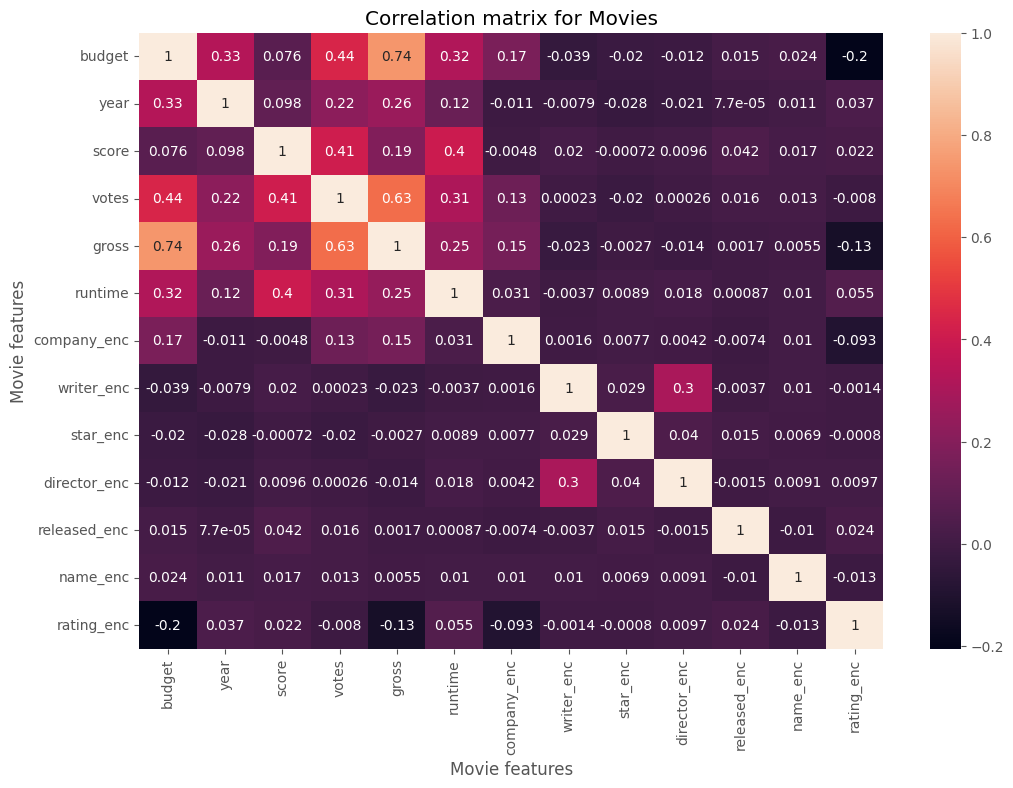

In [11]:
#correlation heat map
#correlation between numerical columns
correlation_matrix = new_df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

CONCLUSION:
It is visible from the correlation matrix that the gross income from any movie is majorly affected by the budget and the votes.
More recent movies accrued higher income.
The company producing a movie is not a major determinant of the gross income. 
